**Jose Miguel Acuña Hernandez**

**jacunah@unal.edu.co**

En este documento dejo explicito los resultados del anáisis de datos realizado a la base de datos *8. Respuestas Acoso Escoral.xlsx - Respuestas de formulario.csv*

#  Librerias, llamado de base de datos y filtrado de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Datos = pd.read_pickle('Datos.pkl').drop(columns=['Colegio', 'Género'])

In [3]:
def clasificar_grupo_familiar(valor):
    if 'Madre' in valor and 'Padre' in valor:
        return 'Ambos'
    elif 'Madre' not in valor and 'Padre' not in valor:
        return 'Ninguno'
    elif 'Madre' in valor and 'Padre' not in valor:
        return 'Solo madre'
    elif 'Padre' in valor and 'Madre' not in valor:
        return 'Solo padre'

Datos['Padres'] = Datos['Grupo familiar'].apply(clasificar_grupo_familiar)
Datos = Datos.drop(columns=['Grupo familiar'])
Datos_padres = Datos.groupby('Padres').sum().reset_index()
Datos_padres

,Padres,Reportes de abuso físico,Reportes de abuso psicológico,Reportes de ciberbullying,Cantidad de estudiantes,Victimas de abuso físico,Victimas de abuso psicológico,Victimas de ciberbullying
0,Ambos,315.0,585.0,142,199,84,109,51
1,Ninguno,21.0,35.0,3,15,5,6,3
2,Solo madre,184.0,354.0,71,107,54,69,31
3,Solo padre,10.0,24.0,29,14,6,6,5


In [4]:
Datos_relativos = Datos_padres.copy()
Datos_relativos['Reportes de abuso físico por estudiante'] = Datos_relativos['Reportes de abuso físico'] / Datos_relativos['Cantidad de estudiantes']
Datos_relativos['Reportes de abuso psicológico por estudiante'] = Datos_relativos['Reportes de abuso psicológico'] / Datos_relativos['Cantidad de estudiantes']
Datos_relativos['Reportes de ciberbullying por estudiante'] = Datos_relativos['Reportes de ciberbullying'] / Datos_relativos['Cantidad de estudiantes']

Datos_relativos['Porcentaje victimas de abuso físico'] = Datos_relativos['Victimas de abuso físico'] / Datos_relativos['Cantidad de estudiantes']*100
Datos_relativos['Porcentaje victimas de abuso psicológico'] = Datos_relativos['Victimas de abuso psicológico'] / Datos_relativos['Cantidad de estudiantes']*100
Datos_relativos['Porcentaje victimas de ciberbullying'] = Datos_relativos['Victimas de ciberbullying'] / Datos_relativos['Cantidad de estudiantes']*100

Datos_relativos.drop(columns=['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying', 'Cantidad de estudiantes', 'Victimas de abuso físico', 'Victimas de abuso psicológico', 'Victimas de ciberbullying'], inplace=True)

# Ambos padres

In [5]:
Ambos = Datos_padres.copy()[Datos_padres['Padres'] == 'Ambos']
print("Los estudiantes que viven con ambos padres reportan ", Ambos['Reportes de abuso físico'].values[0], "casos de abuso físico, ", Ambos['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", Ambos['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

Los estudiantes que viven con ambos padres reportan  315.0 casos de abuso físico,  585.0 casos de abuso psicológico y  142 casos de ciberbullying.


In [6]:
Ambos_relativos = Datos_relativos.copy()[Datos_relativos['Padres'] == 'Ambos']
print("En los estudiantes que viven con sus dos padres, el ", Ambos_relativos['Porcentaje victimas de abuso físico'].values[0], "% reportan ser víctimas de abuso físico, el ", Ambos_relativos['Porcentaje victimas de abuso psicológico'].values[0], "% de abuso psicológico y el ", Ambos_relativos['Porcentaje victimas de ciberbullying'].values[0], "% de ciberbullying.")
print("Los estudiantes que viven con sus dos padres reportan ", Ambos_relativos['Reportes de abuso físico por estudiante'].values[0], "casos de abuso físico por estudiante, ", Ambos_relativos['Reportes de abuso psicológico por estudiante'].values[0], "casos de abuso psicológico por estudiante y ", Ambos_relativos['Reportes de ciberbullying por estudiante'].values[0], "casos de ciberbullying por estudiante.")

En los estudiantes que viven con sus dos padres, el  42.211055276381906 % reportan ser víctimas de abuso físico, el  54.773869346733676 % de abuso psicológico y el  25.628140703517587 % de ciberbullying.
Los estudiantes que viven con sus dos padres reportan  1.5829145728643217 casos de abuso físico por estudiante,  2.9396984924623117 casos de abuso psicológico por estudiante y  0.7135678391959799 casos de ciberbullying por estudiante.


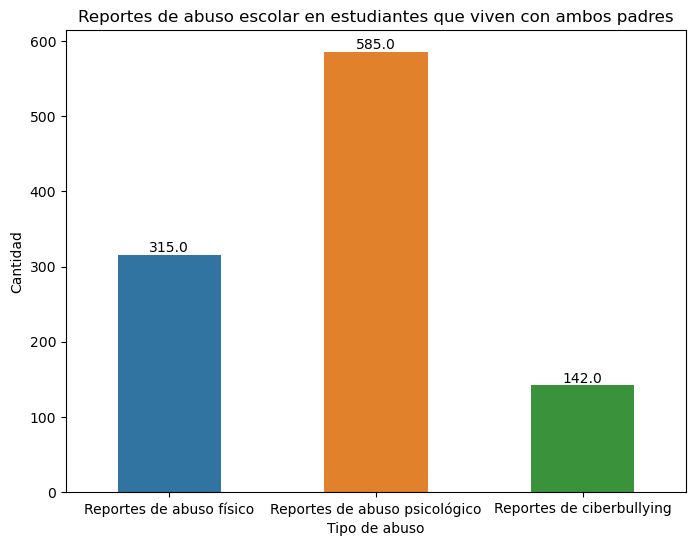

In [7]:
sumas_abusos = Ambos[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso escolar en estudiantes que viven con ambos padres')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

# Ninguno

In [8]:
Ninguno = Datos_padres.copy()[Datos_padres['Padres'] == 'Ninguno']
print("Los estudiantes que no viven con ninguno de sus padres reportan ", Ninguno['Reportes de abuso físico'].values[0], "casos de abuso físico, ", Ninguno['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", Ninguno['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

Los estudiantes que no viven con ninguno de sus padres reportan  21.0 casos de abuso físico,  35.0 casos de abuso psicológico y  3 casos de ciberbullying.


In [9]:
Ninguno_relativos = Datos_relativos.copy()[Datos_relativos['Padres'] == 'Ninguno']
print("En los estudiantes que viven no viven con ninguno de sus padres, el ", Ninguno_relativos['Porcentaje victimas de abuso físico'].values[0], "% reportan ser víctimas de abuso físico, el ", Ninguno_relativos['Porcentaje victimas de abuso psicológico'].values[0], "% de abuso psicológico y el ", Ninguno_relativos['Porcentaje victimas de ciberbullying'].values[0], "% de ciberbullying.")
print("Los estudiantes que no viven con ninguno de sus padres reportan ", Ninguno_relativos['Reportes de abuso físico por estudiante'].values[0], "casos de abuso físico por estudiante, ", Ninguno_relativos['Reportes de abuso psicológico por estudiante'].values[0], "casos de abuso psicológico por estudiante y ", Ninguno_relativos['Reportes de ciberbullying por estudiante'].values[0], "casos de ciberbullying por estudiante.")

En los estudiantes que viven no viven con ninguno de sus padres, el  33.33333333333333 % reportan ser víctimas de abuso físico, el  40.0 % de abuso psicológico y el  20.0 % de ciberbullying.
Los estudiantes que no viven con ninguno de sus padres reportan  1.4 casos de abuso físico por estudiante,  2.3333333333333335 casos de abuso psicológico por estudiante y  0.2 casos de ciberbullying por estudiante.


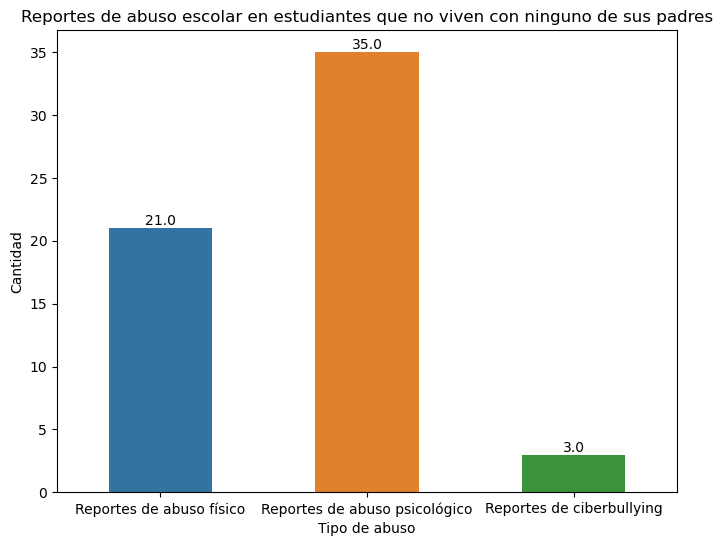

In [10]:
sumas_abusos = Ninguno[['Reportes de abuso físico', 'Reportes de abuso psicológico', 'Reportes de ciberbullying']].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=sumas_abusos.index, y=sumas_abusos.values, width=0.5)

for i, valor in enumerate(sumas_abusos.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Reportes de abuso escolar en estudiantes que no viven con ninguno de sus padres')
plt.xlabel('Tipo de abuso')
plt.ylabel('Cantidad')
plt.show()

# Solo madre

In [ ]:
Solo_madre = Datos_padres.copy()[Datos_padres['Padres'] == 'Solo madre']
print("Los estudiantes que viven solo con su madre reportan ", Solo_madre['Reportes de abuso físico'].values[0], "casos de abuso físico, ", Solo_madre['Reportes de abuso psicológico'].values[0], "casos de abuso psicológico y ", Solo_madre['Reportes de ciberbullying'].values[0], "casos de ciberbullying.")

Los estudiantes que no viven con ninguno de sus padres reportan  21.0 casos de abuso físico,  35.0 casos de abuso psicológico y  3 casos de ciberbullying.
